<a href="https://colab.research.google.com/github/kahmed92/AI-Q2-learning-resources/blob/master/CarPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv("CarPrice_Assignment.csv")
df.head()
#checking null values
df[df.isna().any(axis=1)]
#or
df.isnull().sum()
data=df.copy()
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['fueltype'] = labelencoder.fit_transform(data['fueltype'])
data['aspiration'] = labelencoder.fit_transform(data['aspiration'])
data['carbody'] = labelencoder.fit_transform(data['carbody'])
data['drivewheel'] = labelencoder.fit_transform(data['drivewheel'])
data['enginelocation'] = labelencoder.fit_transform(data['enginelocation'])
data['fuelsystem'] = labelencoder.fit_transform(data['enginelocation'])
data['doornumber'] = data['doornumber'].map({'two':2,'four':4})

data1 = data[['horsepower','boreratio','enginesize','curbweight','carwidth','carlength',
              'wheelbase','drivewheel','price','enginelocation']]
x = (data1.loc[:, data1.columns != 'price'])
y = (data1.loc[:, data1.columns == 'price'])
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=42)
model = Sequential()
###model.add(Dense(64, activation='relu',input_shape=(15,)))
###model.add(Dense(1,))
model.add(Dense(10, input_shape=(9,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='rmsprop',loss='mse', metrics=['mae'])
y=y/y.max()
x_train.head()
x_train=x_train/x_train.max()
y_train=y_train/y_train.max()
history=model.fit(x_train, y_train, epochs=100, validation_split=0.2, batch_size=300) 
#history.history
#train_df,train_labels

Epoch 1/100
1/1 [==============================] - 1s 739ms/step - loss: 0.1751 - mae: 0.3988 - val_loss: 0.1062 - val_mae: 0.2922
Epoch 2/100
1/1 [==============================] - 0s 40ms/step - loss: 0.0988 - mae: 0.2875 - val_loss: 0.0699 - val_mae: 0.2213
Epoch 3/100
1/1 [==============================] - 0s 41ms/step - loss: 0.0626 - mae: 0.2156 - val_loss: 0.0476 - val_mae: 0.1643
Epoch 4/100
1/1 [==============================] - 0s 47ms/step - loss: 0.0411 - mae: 0.1586 - val_loss: 0.0358 - val_mae: 0.1309
Epoch 5/100
1/1 [==============================] - 0s 49ms/step - loss: 0.0299 - mae: 0.1217 - val_loss: 0.0297 - val_mae: 0.1138
Epoch 6/100
1/1 [==============================] - 0s 46ms/step - loss: 0.0241 - mae: 0.0986 - val_loss: 0.0260 - val_mae: 0.1046
Epoch 7/100
1/1 [==============================] - 0s 47ms/step - loss: 0.0208 - mae: 0.0877 - val_loss: 0.0238 - val_mae: 0.1011
Epoch 8/100
1/1 [==============================] - 0s 46ms/step - loss: 0.0188 - mae: 0.0

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


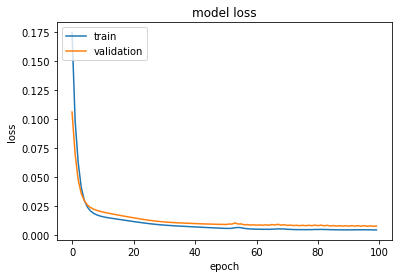

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
#pred_train= model.predict(x_train)
#print(np.sqrt(mean_squared_error(y_train,pred_train)))

#pred= model.predict(x_test)
#print(np.sqrt(mean_squared_error(y_test,pred))) 
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
x_test/=x_test.max()
y_test/=y_test.max()
test_mse_score, test_mae_score = model.evaluate(x_test, y_test)
print("test_mae_score:",test_mae_score)
print("test_mse_score:",test_mse_score)

2/2 [==============================] - 0s 5ms/step - loss: 0.0079 - mae: 0.0635
test_mae_score: 0.0635208785533905
test_mse_score: 0.00789609458297491
